In [25]:
# japanize_matplotlibインポート( plotの文字化けを解消するため )
import japanize_matplotlib

# pandasをインポートし、別名 pd とする
# 実装
import pandas as pd

# treeモジュールのインポート
# 実装
from sklearn import tree

# train_test_splitメソッドのインポート
from sklearn.model_selection import train_test_split

# StandardScalerメソッドのインポート
from sklearn.preprocessing import StandardScaler

# numpyをインポートし、別名 np とする
import numpy as np

# matplotlibをインポートし、別名 plt とする
from matplotlib import pylab as plt

# グラフ描画を当タブに表示
# 実装
%matplotlib inline

# 画像データの表示したい箇所を設定（０ ～ ファイルの最後尾 - 1)

# 画像データ（グレースケール）を表示してみましょう

In [26]:
def displayPictureNum(iDateIndex):
    # 画像イメージ_リスト
    img_list = []

    # csvファイルを読み込み
    df = pd.read_csv('digits.csv', encoding='cp932')

    # 画像表示用に画像データ以外をドロップ
    df = df.drop(["id", "target"], axis=1)

    img_list = df.iloc[iDateIndex].to_list() # リストのインデックスの画像

    array = np.array(img_list)
    array = array.reshape(8,8)

    plt.gray()              # 表示カラーマップをグレースケールとする設定
    plt.imshow(array)       # 画像データを設定
    plt.show()              # 画像データを表示


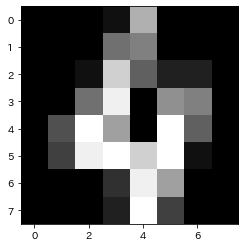

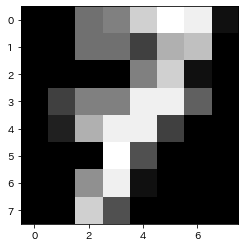

In [27]:
# 文字「4」を表示
displayPictureNum(4)

# 文字「7」を表示
displayPictureNum(7)


# データを先頭５行表示

In [28]:
# csvファイルを読み込み
df = pd.read_csv('digits.csv', encoding='cp932')
df.head(5)

,id,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
0,0,0,0,5,13,9,1,0,0,0,...,0,0,0,6,13,10,0,0,0,0
1,1,0,0,0,12,13,5,0,0,0,...,0,0,0,0,11,16,10,0,0,1
2,2,0,0,0,4,15,12,0,0,0,...,0,0,0,0,3,11,16,9,0,2
3,3,0,0,7,15,13,1,0,0,0,...,0,0,0,7,13,13,9,0,0,3
4,4,0,0,0,1,11,0,0,0,0,...,0,0,0,0,2,16,4,0,0,4


# 正解値の種類を表示してみよう
### [ 構文 ]
### データフレーム[列名].unique() ・・・ マージ処理

In [29]:
# 正解値の種類を表示
hin = df['target'].unique()
len(hin)

for i in hin:
    print("target = {}".format(i))


target = 0
target = 1
target = 2
target = 3
target = 4
target = 5
target = 6
target = 7
target = 8
target = 9


### ↑　正解のデータが０～９であることが分かります

# 欠損値を確認
### 読み込んだデータから欠損値がないかを調べてみましょう！

In [30]:
# 欠損値がないことを確認
df.isnull().sum()

id           0
pixel_0_0    0
pixel_0_1    0
pixel_0_2    0
pixel_0_3    0
            ..
pixel_7_4    0
pixel_7_5    0
pixel_7_6    0
pixel_7_7    0
target       0
Length: 66, dtype: int64

## ↑ 欠損値はないため、ダミー変数、平均値、列削除などは不要と判断

# 特徴量データを取得

## id と target を 外して それ以外(グレースケール値の各データ)を特徴量データとして取得

In [31]:
# 画像表示用に画像データ以外をドロップ
# 画像データを特徴量データとして設定
df_Feature = df.drop(["id", "target"], axis=1)

# 先頭5行を表示
df_Feature.head(5)


,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0,0,5,13,9,1,0,0,0,0,...,0,0,0,0,6,13,10,0,0,0
1,0,0,0,12,13,5,0,0,0,0,...,0,0,0,0,0,11,16,10,0,0
2,0,0,0,4,15,12,0,0,0,0,...,5,0,0,0,0,3,11,16,9,0
3,0,0,7,15,13,1,0,0,0,8,...,9,0,0,0,7,13,13,9,0,0
4,0,0,0,1,11,0,0,0,0,0,...,0,0,0,0,0,2,16,4,0,0


In [32]:
# 正解データ(target)を取得
df_Answer = df['target']

# 正解データ(target)の先頭５行を表示
# 実装
df_Answer.head(5)

0    0
1    1
2    2
3    3
4    4
Name: target, dtype: int64

# 決定モデルを生成し、学習、予習

In [33]:
# 決定木モデルを生成 - 深さ：3
model = tree.DecisionTreeClassifier(max_depth = 3 , random_state=0)

# 正解率が 50 % 行かない

In [34]:
# モデルの学習
model.fit(df_Feature, df_Answer)

# 正解率を計算
model.score(df_Feature, df_Answer)

0.4885920979410128

## 訓練データとテストデータに分割

In [35]:
# 関数のインポート
from sklearn.model_selection import train_test_split

# 訓練データとテストデータに分割（ 訓練データ : 8 テストデータ : 2 ）
x_train, x_test, y_train, y_test = train_test_split(df_Feature, df_Answer, test_size = 0.2, random_state = 0)

# 再度確認（変わらず正解率は、50 % 以下）

In [36]:
# 訓練データで再学習
model.fit(x_train, y_train)

# テストデータを使用して成果率を計算し表示
model.score(x_test, y_test)

0.425

# 予測して当たるかを確認

## 参考記事 : https://www.delftstack.com/ja/howto/python/convert-image-to-grayscale-python/#python-%E3%81%A7-scikit-image-%E3%83%A2%E3%82%B8%E3%83%A5%E3%83%BC%E3%83%AB%E3%81%AE-color-rgb2gray-%E3%83%A1%E3%82%BD%E3%83%83%E3%83%89%E3%82%92%E7%94%A8%E3%81%84%E3%81%A6%E7%94%BB%E5%83%8F%E3%82%92%E3%82%B0%E3%83%AC%E3%83%BC%E3%82%B9%E3%82%B1%E3%83%BC%E3%83%AB%E3%81%AB%E5%A4%89%E6%8F%9B%E3%81%99%E3%82%8B
## 参考記事 : https://qiita.com/zaburo/items/0b9db87d0a52191b164b

In [37]:
# pip install scikit-image をインストール

# Image をインポート　
from PIL import Image

## 画像ファイルを読み込み、該当のモデルから予測結果を出力&実際画像（グレースケール）を表示する関数を作成

In [38]:
# [ 読み込んだ画像ファイルを予測する関数 ]
# 引数：st_filename ・・・ ファイル名
# 引数：mdl_input ・・・ 予測モデル
# 引数：x_train
# 戻り値：なし
def predictInputImage(st_filename , mdl_input, x_input , y_input):
    # filenameから画像ファイルをオープン
    img = Image.open(st_filename)

    # ファイルをグレースケールに変換
    imgGray = img.convert('L')

    # 空リスト
    li_buff = []

    # X軸
    for y in range(imgGray.size[1]):
        #Y軸
        for x in range(imgGray.size[0]):
            val = imgGray.getpixel((x,y))
            li_buff.append(val)

    # 予測用をリスト作成
    li_pixel = [li_buff]

    # 予測する値を標準化
    sc = StandardScaler()
    sc.fit(x_input, y_input)
    std_li_pixel = sc.transform(li_pixel)

    # 予測
    print("予測結果 = " + str(mdl_input.predict(std_li_pixel).item()))

    ar_img = np.array(li_pixel) # NumPy - 配列生成
    ar_img = ar_img.reshape(8,8)# 8 × 8の形状に変更
    plt.imshow(ar_img)          # 画像データを設定
    plt.show()                  # 画像データを表示


# ７（seven.jpg）の文字画像( 8 x 8 = 64pixel )を読み込み、予想

予測結果 = 7


C:\Users\m_yabuta\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\m_yabuta\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


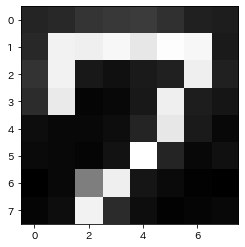

C:\Users\m_yabuta\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\m_yabuta\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


予測結果 = 7


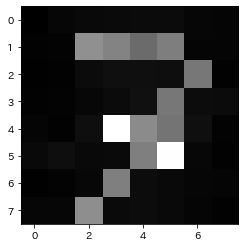

予測結果 = 7


C:\Users\m_yabuta\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\m_yabuta\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


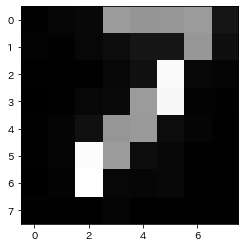

予測結果 = 4


C:\Users\m_yabuta\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\m_yabuta\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


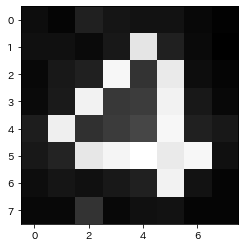

C:\Users\m_yabuta\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\m_yabuta\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


予測結果 = 3


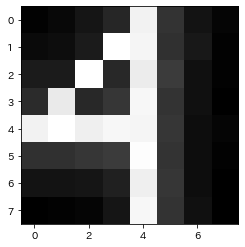

予測結果 = 4


C:\Users\m_yabuta\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\m_yabuta\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


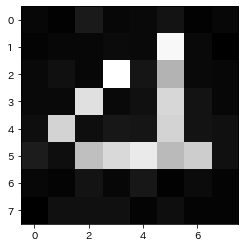

In [39]:
# 文字「7」予測 - 複数パターン - 癖字も含む
predictInputImage("seven_pattern1.jpg", model, x_train, y_train )
predictInputImage("seven_pattern2.jpg", model, x_train, y_train )
predictInputImage("seven_pattern3.jpg", model, x_train, y_train )

# 文字「4」予測 - 複数パターン - 癖字も含む
predictInputImage("four_pattern1.jpg", model, x_train, y_train )
predictInputImage("four_pattern2.jpg", model, x_train, y_train )
predictInputImage("four_pattern3.jpg", model, x_train, y_train )

# 決定木の深さから精度の違いを見てみよう

In [40]:
# [ 学習関数 ]
# 引数：x ・・・ 特徴量データ
# 引数：t ・・・ 正解データ
# 引数：depth ・・・ 決定木の深さ(デフォルト=3)
# 戻り値 深さ、訓練データの精度、テストデータの精度
def learn(x,t,depth=3):
    # 訓練データとテストデータに分割
    x_train,x_test,y_train,y_test = train_test_split(x,t,test_size = 0.2,random_state = 0)
    # 決定木モデルの生成
    model = tree.DecisionTreeClassifier(max_depth =depth)
    # 学習
    model.fit(x_train,y_train)
    # 精度(正解率)を算出し戻す
    score=model.score(X=x_train,y=y_train)
    score2=model.score(X=x_test,y=y_test)
    return round(score,3),round(score2,3),model

In [41]:
# １～１５までの深さを出力
for j in range(1,15): # jは木の深さ
 # xは特徴量、tは目的変数
    s1,s2,m = learn(df_Feature,df_Answer,depth = j)
    s='深さ{}:訓練データの精度{}::テストデータの精度{}'
    print(s.format(j,s1,s2))

深さ1:訓練データの精度0.209::テストデータの精度0.156
深さ2:訓練データの精度0.333::テストデータの精度0.261
深さ3:訓練データの精度0.491::テストデータの精度0.425
深さ4:訓練データの精度0.711::テストデータの精度0.631
深さ5:訓練データの精度0.795::テストデータの精度0.731
深さ6:訓練データの精度0.867::テストデータの精度0.789
深さ7:訓練データの精度0.923::テストデータの精度0.822
深さ8:訓練データの精度0.952::テストデータの精度0.836
深さ9:訓練データの精度0.976::テストデータの精度0.853
深さ10:訓練データの精度0.99::テストデータの精度0.861
深さ11:訓練データの精度0.996::テストデータの精度0.858
深さ12:訓練データの精度0.999::テストデータの精度0.853
深さ13:訓練データの精度1.0::テストデータの精度0.85
深さ14:訓練データの精度1.0::テストデータの精度0.861


# DecisionTreeClassifier メソッドのパラメータについて
## ●max_depth
### ツリーの最大深度を設定するパラメータ
## ●min_samples_leaf
### 葉を構成するのに必要な最小数を設定するパラメータ(デフォルト=2)
### 小数を指定した場合，元々のサンプルサイズに占める割合と解釈。小さいと過学習気味となる
## ●random_state
### 乱数ジェネレータによって使用されるシード数を設定するパラメータ
## 残りは下記の記事を参照

# 参考記事 : https://data-analysis-stats.jp/python/%e6%b1%ba%e5%ae%9a%e6%9c%a8%e5%88%86%e6%9e%90%e3%81%ae%e3%83%91%e3%83%a9%e3%83%a1%e3%83%bc%e3%82%bf%e8%a7%a3%e8%aa%ac/

# 参考記事 : https://qiita.com/si1242/items/d2f9195c08826d87d6ad

# 決定木モデルのパラメータを調整して再度正解率を見てみよう

In [42]:
# 【チューニングその１ - パラメータからのチューニング】
# 上記の記事にて決定木モデル生成時にパラメータから微調整
model = tree.DecisionTreeClassifier(
    max_depth = 13 ,        # ツリーの最大深
    min_samples_leaf = 3,   # ノードを分割するために必要な最小サンプルサイズ
    random_state = 0        # 乱数ジェネレータによって使用されるシード
)

In [43]:
# 訓練データで再学習
model.fit(x_train, y_train)

# テストデータを使用して成果率を計算し表示
model.score(x_test, y_test)

0.8583333333333333

# 正解率は85%まで上がった！
# では、実際に予測してみたら？

予測結果 = 3


C:\Users\m_yabuta\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\m_yabuta\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


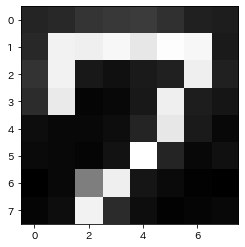

C:\Users\m_yabuta\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\m_yabuta\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


予測結果 = 7


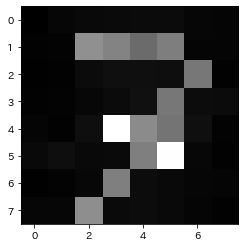

C:\Users\m_yabuta\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\m_yabuta\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


予測結果 = 3


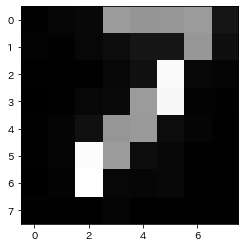

C:\Users\m_yabuta\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\m_yabuta\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


予測結果 = 4


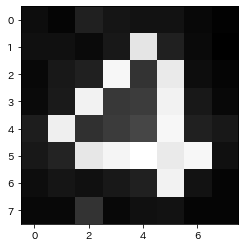

予測結果 = 7


C:\Users\m_yabuta\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\m_yabuta\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


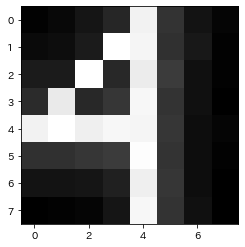

予測結果 = 4


C:\Users\m_yabuta\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\m_yabuta\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


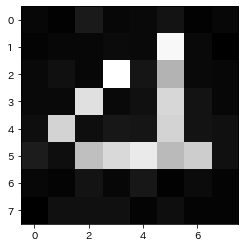

In [44]:
# 文字「7」予測 - 複数パターン - 癖字も含む
predictInputImage("seven_pattern1.jpg", model, x_train, y_train )
predictInputImage("seven_pattern2.jpg", model, x_train, y_train )
predictInputImage("seven_pattern3.jpg", model, x_train, y_train )

# 文字「4」予測 - 複数パターン - 癖字も含む
predictInputImage("four_pattern1.jpg", model, x_train, y_train )
predictInputImage("four_pattern2.jpg", model, x_train, y_train )
predictInputImage("four_pattern3.jpg", model, x_train, y_train )

# 全て正解していないため、モデルをランダムフォレストに変更してみよう

# 参考記事：https://qiita.com/hara_tatsu/items/581db994ec8866afe8f8

In [45]:
# 【チューニングその２　―　ランダムフォレスト】
#  ランダムフォレストでは、複数の決定木モデルを生成し、それらモデルの多数決によって最終的な予測を決定するという仕組み
from sklearn.ensemble import RandomForestClassifier

# ランダムフォレストでモデル生成
ran_model = RandomForestClassifier( max_depth = 13, min_samples_leaf = 3, random_state = 0 )

# 学習
ran_model.fit(x_train, y_train)

# テストデータを使用して成果率を計算し表示
ran_model.score(x_test, y_test)


0.9527777777777777

# 正解率が95% まで上昇したので、再度予測

予測結果 = 7


C:\Users\m_yabuta\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\m_yabuta\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


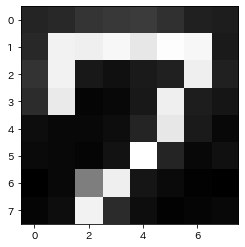

C:\Users\m_yabuta\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\m_yabuta\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


予測結果 = 7


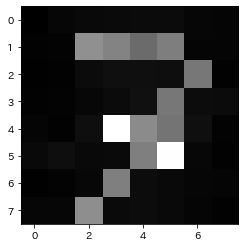

予測結果 = 7


C:\Users\m_yabuta\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\m_yabuta\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


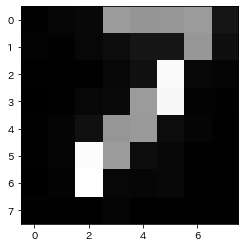

C:\Users\m_yabuta\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"


予測結果 = 4


C:\Users\m_yabuta\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


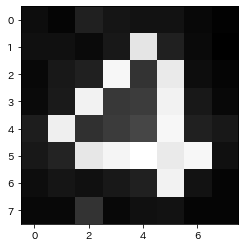

C:\Users\m_yabuta\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\m_yabuta\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


予測結果 = 4


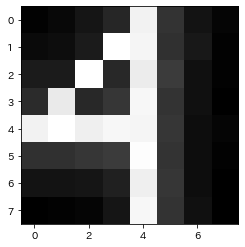

C:\Users\m_yabuta\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\m_yabuta\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


予測結果 = 4


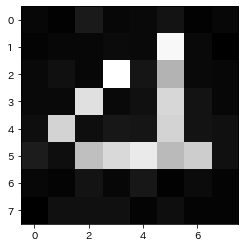

In [48]:
# 文字「7」予測 - 複数パターン - 癖字も含む
predictInputImage("seven_pattern1.jpg", ran_model, x_train, y_train )
predictInputImage("seven_pattern2.jpg", ran_model, x_train, y_train )
predictInputImage("seven_pattern3.jpg", ran_model, x_train, y_train )

# 文字「4」予測 - 複数パターン - 癖字も含む
predictInputImage("four_pattern1.jpg", ran_model, x_train, y_train )
predictInputImage("four_pattern2.jpg", ran_model, x_train, y_train )
predictInputImage("four_pattern3.jpg", ran_model, x_train, y_train )


# 正解！！

## 最後にモデルを保存
### モデル名 ： hand_written.pkl

In [47]:
# pickle インポート
import pickle

# モデル保存
with open('hand_written.pkl','wb') as f:
  pickle.dump(ran_model,f)